In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
housing = fetch_california_housing()
X, y = housing.data, housing.target

In [3]:
df = pd.DataFrame(X, columns=housing.feature_names)

df['Target'] = y

df.head(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [5]:
df.isnull().values.any()

False

In [6]:
X=df.drop(columns=["Target"])
y=df["Target"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [7]:
alfa =[0.01, 0.1, 1]
for alpha in alfa:
    lasso = Lasso(alpha=alpha, max_iter=1000)
    lasso.fit(X_train, y_train)
    y_pred = lasso.predict(X_test)

In [8]:

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)


Mean Squared Error (MSE): 0.9345280531749283
Mean Absolute Error (MAE): 0.7609780549289142
R2 Score: 0.288000383674784


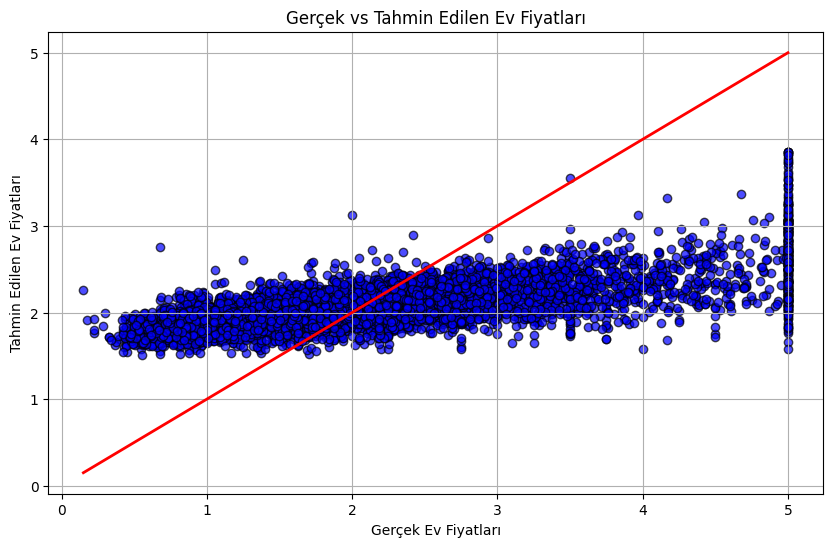

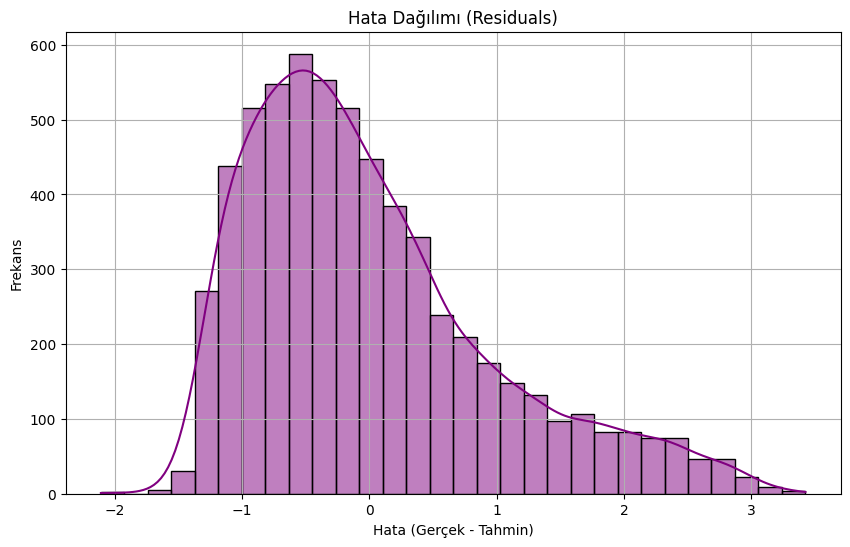

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.title('Gerçek vs Tahmin Edilen Ev Fiyatları')
plt.xlabel('Gerçek Ev Fiyatları')
plt.ylabel('Tahmin Edilen Ev Fiyatları')
plt.grid(True)
plt.show()

residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30, color='purple')
plt.title('Hata Dağılımı (Residuals)')
plt.xlabel('Hata (Gerçek - Tahmin)')
plt.ylabel('Frekans')
plt.grid(True)
plt.show()
